In [1]:
# IMPORT NEEDED LIBRARIES
import pandas as pd
import numpy as np
import hvplot.pandas 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

Additional Files Added for Total Sales Analysis

simplemaps/data: database of cities and towns without the US feeding from the US Census Bureau and US Geological Survey into one location

In [2]:
# LOAD REAL ESTATE DATA & PUT INTO DF
median_sp_df = pd.DataFrame(pd.read_csv(r'Raw CSV Files\Metro Median Sales Price_reformatted.csv'))
mean_sp_df =  pd.DataFrame(pd.read_csv(r'Raw CSV Files\Metro Mean Sale Price_reformatted.csv'))
median_lp_df = pd.DataFrame(pd.read_csv(r'Raw CSV Files\Metro Median Listing Price_reformatted.csv'))
total_sales_df = pd.DataFrame(pd.read_csv(r'Raw CSV Files\Metro Sales Count_reformatted.csv'))
assessed_value_df = pd.DataFrame(pd.read_csv(r'Raw CSV Files\Assessed Home Value_reformatted.csv'))

# LOAD UNITED STATES CITY INFORMATION
us_city_df = pd.DataFrame(pd.read_csv(r'Raw CSV Files\US City Information.csv'))
#Check that loading and df were successful
# us_city_df.head()

In [3]:
# RENAMING AND CAPITALIZATION
median_sp_df = median_sp_df.rename(columns={'Date': 'Date of Median Sales',
                                             'Median Sale Price': 'Median Sales Price'})

mean_sp_df = mean_sp_df.rename(columns={'Date': 'Date of Average Sales',
                                         'Mean Sales Price': 'Average Sales Price'})

median_lp_df = median_lp_df.rename(columns={'Date': 'Date of Median Listing Prices'})

assessed_value_df = assessed_value_df.rename(columns={'Date': 'Assessment Date',
                                                    'Price': 'Assessed Value'})
total_sales_df = total_sales_df.rename(columns={'Date': 'Date of Total Sales'})

In [4]:
# PREP DATA FOR JOINS

# Split the each date column into three new columns: 'month' 'day' 'year'
median_sp_df[['Month', 'Day','Year']] = median_sp_df['Date of Median Sales'].str.split('/', expand=True)
mean_sp_df[['Month', 'Day', 'Year']] = mean_sp_df['Date of Average Sales'].str.split('/', expand=True)
median_lp_df[['Month', 'Day', 'Year']] = median_lp_df['Date of Median Listing Prices'].str.split('/', expand=True)
total_sales_df[['Month', 'Day', 'Year']] = total_sales_df['Date of Total Sales'].str.split('/', expand=True)
assessed_value_df[['Month', 'Day', 'Year']] = assessed_value_df['Assessment Date'].str.split('/', expand=True)

In [5]:
#DROP COLUMNS NOT NEEDED
assessed_value_clean_df = assessed_value_df.drop(columns=['SizeRank', 'RegionType', 'StateName', 'Day'])
median_lp_clean_df = median_lp_df.drop(columns=['SizeRank', 'RegionType', 'StateName', 'Day', 'RegionName'])
median_sp_clean_df = median_sp_df.drop(columns=['SizeRank', 'RegionType', 'StateName', 'Day', 'RegionName'])
mean_sp_clean_df = mean_sp_df.drop(columns=['SizeRank', 'RegionType', 'StateName', 'Day', 'RegionName'])
total_sales_clean_df = total_sales_df.drop(columns=['SizeRank', 'RegionType', 'StateName', 'Day', 'RegionName'])

In [6]:
#MERGE DATA

initial_join = pd.merge(assessed_value_clean_df,median_lp_clean_df, on=["RegionID", "Month","Year"], how="left")
# initial_join.head()
second_join = pd.merge(initial_join,median_sp_clean_df, on=["RegionID", "Month","Year"], how="left")
# print(second_join.head())
third_join = pd.merge(second_join,mean_sp_clean_df, on=["RegionID", "Month","Year"], how="left")
# print(second_join.head())
re_price_analysis_df = pd.merge(third_join,total_sales_clean_df, on=["RegionID", "Month","Year"], how="left")

# CONVERT MONTH AND YEAR TO INT
re_price_analysis_df[['Month', 'Year']] = re_price_analysis_df[['Month', 'Year']].astype('int64') 

re_price_analysis_df.head()

# filter_check = re_price_analysis.loc[re_price_analysis["Year"]>=2018,:]
# filter_check.head()

,RegionID,RegionName,Assessment Date,Assessed Value,Month,Year,Date of Median Listing Prices,Median Listing Price,Date of Median Sales,Median Sales Price,Date of Average Sales,Average Sales Price,Date of Total Sales,Total Sales
0,394913,"New York, NY",1/31/2000,217122.5410,1,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,753899,"Los Angeles, CA",1/31/2000,221698.8018,1,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,394463,"Chicago, IL",1/31/2000,152707.0708,1,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,394514,"Dallas, TX",1/31/2000,125949.5060,1,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,394692,"Houston, TX",1/31/2000,121810.3280,1,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# REORGANIZE COLUMNS 
re_price_analysis_df = re_price_analysis_df[["RegionID", "RegionName", "Month", "Year", "Assessment Date", "Assessed Value", 
                                       "Date of Median Listing Prices", "Median Listing Price", 
                                       "Date of Median Sales", "Median Sales Price", 
                                       "Date of Average Sales",	"Average Sales Price",	
                                       "Date of Total Sales", "Total Sales"]]

re_price_analysis_df.head()

,RegionID,RegionName,Month,Year,Assessment Date,Assessed Value,Date of Median Listing Prices,Median Listing Price,Date of Median Sales,Median Sales Price,Date of Average Sales,Average Sales Price,Date of Total Sales,Total Sales
0,394913,"New York, NY",1,2000,1/31/2000,217122.5410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,753899,"Los Angeles, CA",1,2000,1/31/2000,221698.8018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,394463,"Chicago, IL",1,2000,1/31/2000,152707.0708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,394514,"Dallas, TX",1,2000,1/31/2000,125949.5060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,394692,"Houston, TX",1,2000,1/31/2000,121810.3280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#EXPORT DATA INTO NEW CSV --JUST TO CHECK

# re_price_analysis.to_csv("output_data/re_price_analysis.csv", index_label="RegionID")

Total Sales Volume Analysis

Questions for Analysis:

What is the overall yearly sales trend? 

What states have the highest sales overall?

Does the assessed value, listing, and/or sale price affect real estate sales?

What do the regional sales indicate about the real estate market per region? 


In [9]:
#WANT TOTAL SALES POPULATED
re_price_analysis_df_copy = re_price_analysis_df.copy()

re_price_analysis_df_copy[['Metro', 'State']] = re_price_analysis_df_copy['RegionName'].str.split(',', expand=True)

total_sales_df = re_price_analysis_df_copy[re_price_analysis_df_copy["Total Sales"].notna()] #Give me total houses sold that is recorded
total_sales_df = total_sales_df[["Month", "Year", "Metro", "State", "Assessed Value", "Median Listing Price", "Total Sales", "Average Sales Price", "Median Sales Price"]]
total_sales_df.head()

,Month,Year,Metro,State,Assessed Value,Median Listing Price,Total Sales,Average Sales Price,Median Sales Price
47881,2,2008,New York,NY,453677.7882,NaN,8667.0,552431.0,396550.0
47882,2,2008,Los Angeles,CA,530844.9901,NaN,4141.0,622367.0,470000.0
47883,2,2008,Chicago,IL,246333.6319,NaN,5576.0,284472.0,216000.0
47884,2,2008,Dallas,TX,154553.0285,NaN,4874.0,191768.0,138525.0
47885,2,2008,Houston,TX,154284.5001,NaN,4112.0,197738.0,145000.0


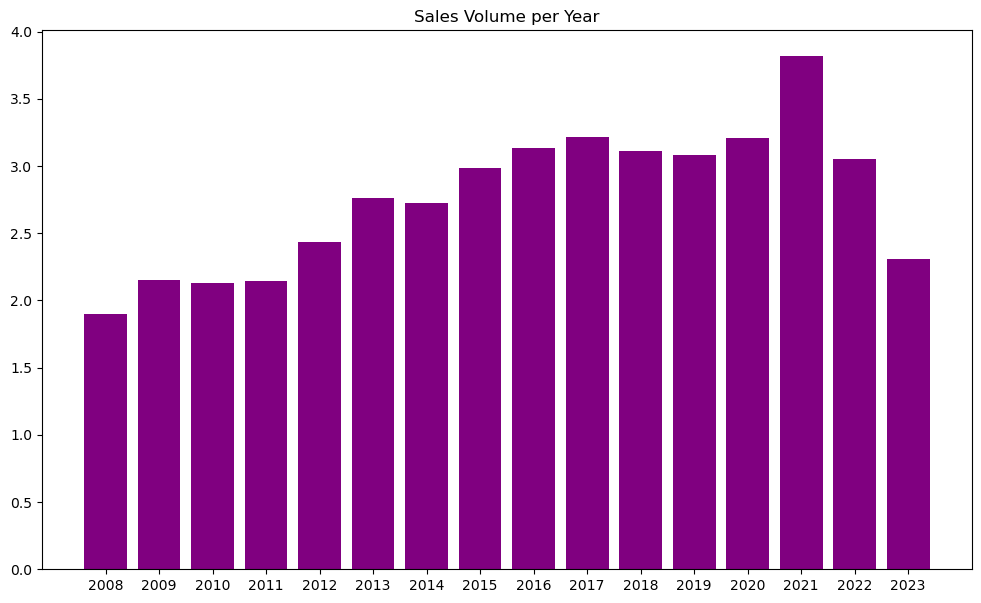

In [26]:
#YEARLY COMPARISON TREND OVER TIME
yearly_sales = pd.DataFrame(total_sales_df.groupby("Year")[["Total Sales"]].sum())
yearly_sales["Total Sales(Mil)"] = yearly_sales["Total Sales"] / 1000000 #cleanly fit to graph
yearly_sales = yearly_sales.drop(index=2024) #removed 2024 from the yearly trend analysis because 2024 is not complete
# yearly_sales #check output before plotting

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(yearly_sales.index, yearly_sales["Total Sales(Mil)"], color="purple")  # Use 'Year' as x-axis
plt.xticks(yearly_sales.index)
plt.title("Sales Volume per Year")

plt.show()

Yearly Trend: 

Between 2008 to 2021, the real estate market has experienced a gradual increase in total sales. In 2021, sales volume skyrocketed due to affordable housing during the height of covid. Post 2021, we see that the volume of sales begins to decline over the last two years, in response to the housing marketing restabilizing. 

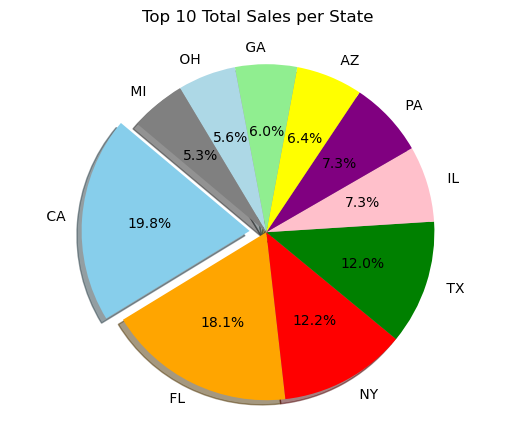

In [28]:
#FIND AND PLOT TOP 10 STATE TOTAL SALES COUNT OVERALL
total_state_sales = total_sales_df.groupby("State")[["Total Sales"]].sum().reset_index().set_index("State")
total_state_sales = total_state_sales.sort_values(by=["Total Sales"], ascending=False)
# total_state_sales = pd.DataFrame(total_state_sales[["Total Sales"]].map("{:,.0f}".format)) #commented out because number cannot be plotted if formatted
top_10_states = total_state_sales.head(10)
# top_10_states


states = top_10_states.index
# states
total_sales = top_10_states["Total Sales"]
# total_sales
colors = ["skyblue", "orange", "red", "green", "pink", "purple", "yellow", "lightgreen", "lightblue", "grey"]
explode = (0.1,0,0,0,0,0,0,0,0,0) #seperate biggest slice from the rest to emphasize; got this from a previous class exercise
plt.pie(total_sales, explode=explode, labels=states, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140) #got this from a previous class exercise

# Create axes which are equal to have a perfect circle
plt.axis("equal")

plt.title("Top 10 Total Sales per State\n")
plt.show()

Top 10 Comparisons: 

Throughout the United States, California’s real estate market has a higher percentage of sales (19.8%) with Florida having the second highest percentage of 18.1%. This could be due to numerous factors affecting each states’ respective market (economic profile, demographics, personal income, etc.).

The correlation between both factors is 0.2281


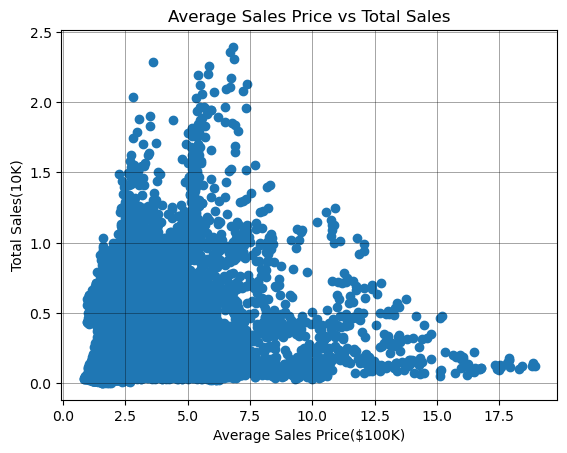

In [24]:
average_sales_df = pd.DataFrame(total_sales_df.groupby(["Average Sales Price"])["Total Sales"].sum().reset_index())
average_sales_df["Total Sales(10K)"] = average_sales_df[ "Total Sales"] / 10000
average_sales_df["Average Sales Price($100K)"] = average_sales_df["Average Sales Price"] / 100000
average_sales_df = average_sales_df.sort_values(by="Total Sales", ascending=False)

x_values = average_sales_df['Average Sales Price($100K)'] #Independent Variable 
y_values = average_sales_df['Total Sales(10K)'] #Dependent Variable

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Average Sales Price($100K)")
plt.ylabel("Total Sales(10K)")
plt.title("Average Sales Price vs Total Sales")
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.5) 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# Show plot
plt.show()

The correlation between both factors is -0.0269


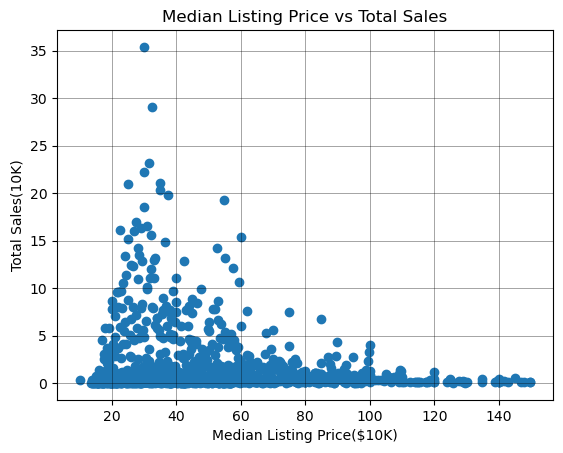

In [21]:
#PREP FOR CORRELATION ANALYSIS: LISTING PRICE AND TOTAL SALES
total_listing_df = pd.DataFrame(total_sales_df.groupby(["Median Listing Price"])["Total Sales"].sum().reset_index())
total_listing_df[["Median Listing Price($10K)", "Total Sales(10K)"]] = total_listing_df[["Median Listing Price", "Total Sales"]] / 10000
total_listing_df = total_listing_df.sort_values(by="Total Sales", ascending=False)

x_values = total_listing_df['Median Listing Price($10K)'] #Independent Variable
y_values = total_listing_df['Total Sales(10K)'] #Dependent Variable

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Median Listing Price($10K)")
plt.ylabel("Total Sales(10K)")
plt.title("Median Listing Price vs Total Sales")
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.5) 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")
# Show plot
plt.show()

The correlation between both factors is 0.1914


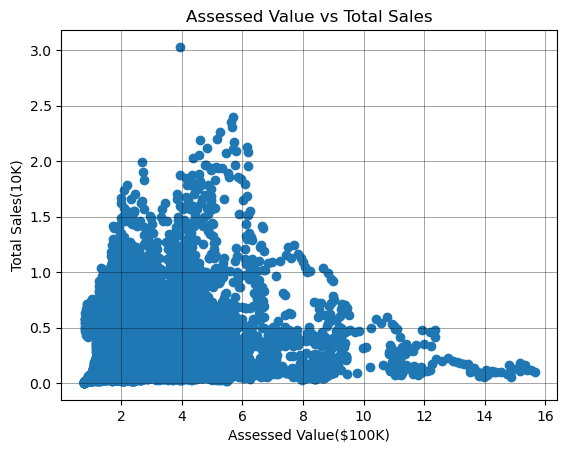

In [25]:
#PREP FOR CORRELATION ANALYSIS: ASSESSED VALUE AND TOTAL SALES
total_assessed_df = pd.DataFrame(total_sales_df.groupby(["Assessed Value"])["Total Sales"].sum().reset_index())
total_assessed_df["Assessed Value($100K)"] = total_assessed_df["Assessed Value"] / 100000
total_assessed_df["Total Sales(10K)"] = total_assessed_df["Total Sales"] / 10000
total_assessed_df = total_assessed_df.sort_values(by="Total Sales", ascending=False)

x_values = total_assessed_df['Assessed Value($100K)'] #Independent Variable
y_values = total_assessed_df['Total Sales(10K)'] #Dependent Variable

# Incorporate the other graph properties
plt.scatter(x_values, y_values)
plt.xlabel("Assessed Value($100K)")
plt.ylabel("Total Sales(10K)")
plt.title("Assessed Value vs Total Sales")
plt.grid(color='black', linestyle='-', linewidth=0.5, alpha=0.5) 
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

# Show plot
plt.show()

Correlation Analysis: 

Average Sales Price vs Total Sales – The correlation is weak (R-value: 0.228), meaning that the relationship between sales volume and sales price is not strong. In other words, it is not reliable to make predictions on sales volume solely based around sales price.

Listing Price vs Total Sales - There is a very weak negative to no correlation (R-value: -0.0269) between listing price and sales volume. This implies that changes in property listing price have a very little to no effect on sales volume.

Assessed Value – Similar to sales price, there is a weak (R-value: 0.1914) correlation between assessed value and sales volume. This suggests that the variation in total sales cannot be explained by the assessed value.

    

In [118]:
#IMPORT METRO AREAS GEOGRAPHIC LOCATIONS FOR MAP
us_city_df = us_city_df.rename(columns={'city': 'City',
                                        'county_name': 'County Name',
                                        'state_id': 'State ID',
                                        'state_name': 'State Name',
                                        'lat': 'Latitude',
                                        'lng': 'Longitude',
                                        'population': 'Population',
                                        'density': 'Density'}) 


us_city_df.head()

,City,State ID,State Name,County Name,Latitude,Longitude,Population,Density
0,New York,NY,New York,Queens,40.6943,-73.9249,18908608,11080.3
1,Los Angeles,CA,California,Los Angeles,34.1141,-118.4068,11922389,3184.7
2,Chicago,IL,Illinois,Cook,41.8375,-87.6866,8497759,4614.5
3,Miami,FL,Florida,Miami-Dade,25.7840,-80.2101,6080145,4758.9
4,Houston,TX,Texas,Harris,29.7860,-95.3885,5970127,1384.0


In [119]:
#BRING IN US DATA INFO
total_sales_df['State'] = total_sales_df['State'].str.strip() #join wasn't working original because state and state id had leading/trailing spaces
us_city_df['State ID'] = us_city_df['State ID'].str.strip()


re__analysis_coord = pd.merge(total_sales_df,us_city_df, left_on=["Metro", "State"],  right_on=["City", "State ID"], how="inner") #only want matches


re__analysis_coord.head()

,Month,Year,Metro,State,Assessed Value,Median Listing Price,Total Sales,Average Sales Price,Median Sales Price,City,State ID,State Name,County Name,Latitude,Longitude,Population,Density
0,2,2008,New York,NY,453677.7882,NaN,8667.0,552431.0,396550.0,New York,NY,New York,Queens,40.6943,-73.9249,18908608,11080.3
1,2,2008,Los Angeles,CA,530844.9901,NaN,4141.0,622367.0,470000.0,Los Angeles,CA,California,Los Angeles,34.1141,-118.4068,11922389,3184.7
2,2,2008,Chicago,IL,246333.6319,NaN,5576.0,284472.0,216000.0,Chicago,IL,Illinois,Cook,41.8375,-87.6866,8497759,4614.5
3,2,2008,Dallas,TX,154553.0285,NaN,4874.0,191768.0,138525.0,Dallas,TX,Texas,Dallas,32.7935,-96.7667,5830932,1478.7
4,2,2008,Houston,TX,154284.5001,NaN,4112.0,197738.0,145000.0,Houston,TX,Texas,Harris,29.7860,-95.3885,5970127,1384.0


In [123]:
#OVERALL TOTAL SALES BY METRO AREA FOR PLOTTING
grouped_metro_df = pd.DataFrame(re__analysis_coord.groupby(["Metro", "State", "Latitude", "Longitude"])["Total Sales"].sum())
grouped_metro_df.reset_index(inplace=True)
grouped_metro_df.head()

map_plot = grouped_metro_df.hvplot.points(
    "Longitude",
    "Latitude",
    size = "Total Sales",
    scale = .02,
    geo = True,
    tiles = "OSM",
    color = "Metro",
    alpha = .5,
    frame_width = 700,
    frame_height = 500
)

map_plot

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Metro,Total Sales)

In [126]:
#TOTAL SALES BY METRO AREA LAST YEAR
analysis_2023 = re__analysis_coord.loc[re__analysis_coord["Year"]==2023,:]
# analysis_2023.head()

grouped_year_df = pd.DataFrame(analysis_2023.groupby(["Year", "Metro", "State", "Latitude", "Longitude"])["Total Sales"].sum())
grouped_year_df.reset_index(inplace=True)
# grouped_year_df.head()

map_plot = grouped_year_df.hvplot.points(
    "Longitude",
    "Latitude",
    size = "Total Sales",
    scale = .09,
    geo = True,
    tiles = "OSM",
    color = "Metro",
    alpha = 1,
    marker = "x",
    frame_width = 700,
    frame_height = 500
)

map_plot




:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Metro,Total Sales)

Regional Comparison: 

Evidently, the frequency of sales and total number of houses sold begins to increase as the data is distributed from the west to the east, indicating that the eastern region is real estate market is more successful. The same insight can be made when comparing the frequency of sales and total number of houses sold between the northern and southern regions, with the southern region showing more promise. 


Conclusions: 

In conclusion, given the correlations between sales volume to sales and listing price, and assessed value, it is evident that these three factors do not have significant influence in a buyer’s decision-making process. To further this analysis, exploring other factors such as mortgage interest rates, property tax rates, personal income, economic profiles, etc. throughout the states could provide better comprehension as to what really drives sales volume, which in turn influencing the real estate market of the United States as a whole. It is also noticable that East and South have more favorability in the real estate market.